In [2]:
import scvelo as scv
scv.settings.verbosity = 0
dataset = '../data/Melania/adata_human_def.h5'
label = 'type2'
exp_metrics = {}

In [3]:
import unitvelo as utv

(Running UniTVelo 0.1.dev1+g1881f6e)
2022-03-25 14:32:00


In [4]:
cluster_edges = [
    ("MEMP", "Early Erythroid"), 
    ("Early Erythroid", "Mid  Erythroid"),
    ("Mid  Erythroid", "Late Erythroid")]

## scVelo stochastic

Filtered out 21711 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1500 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:50) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
---> # of velocity genes used 884
    finished (0:00:21) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:01:40) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:10) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


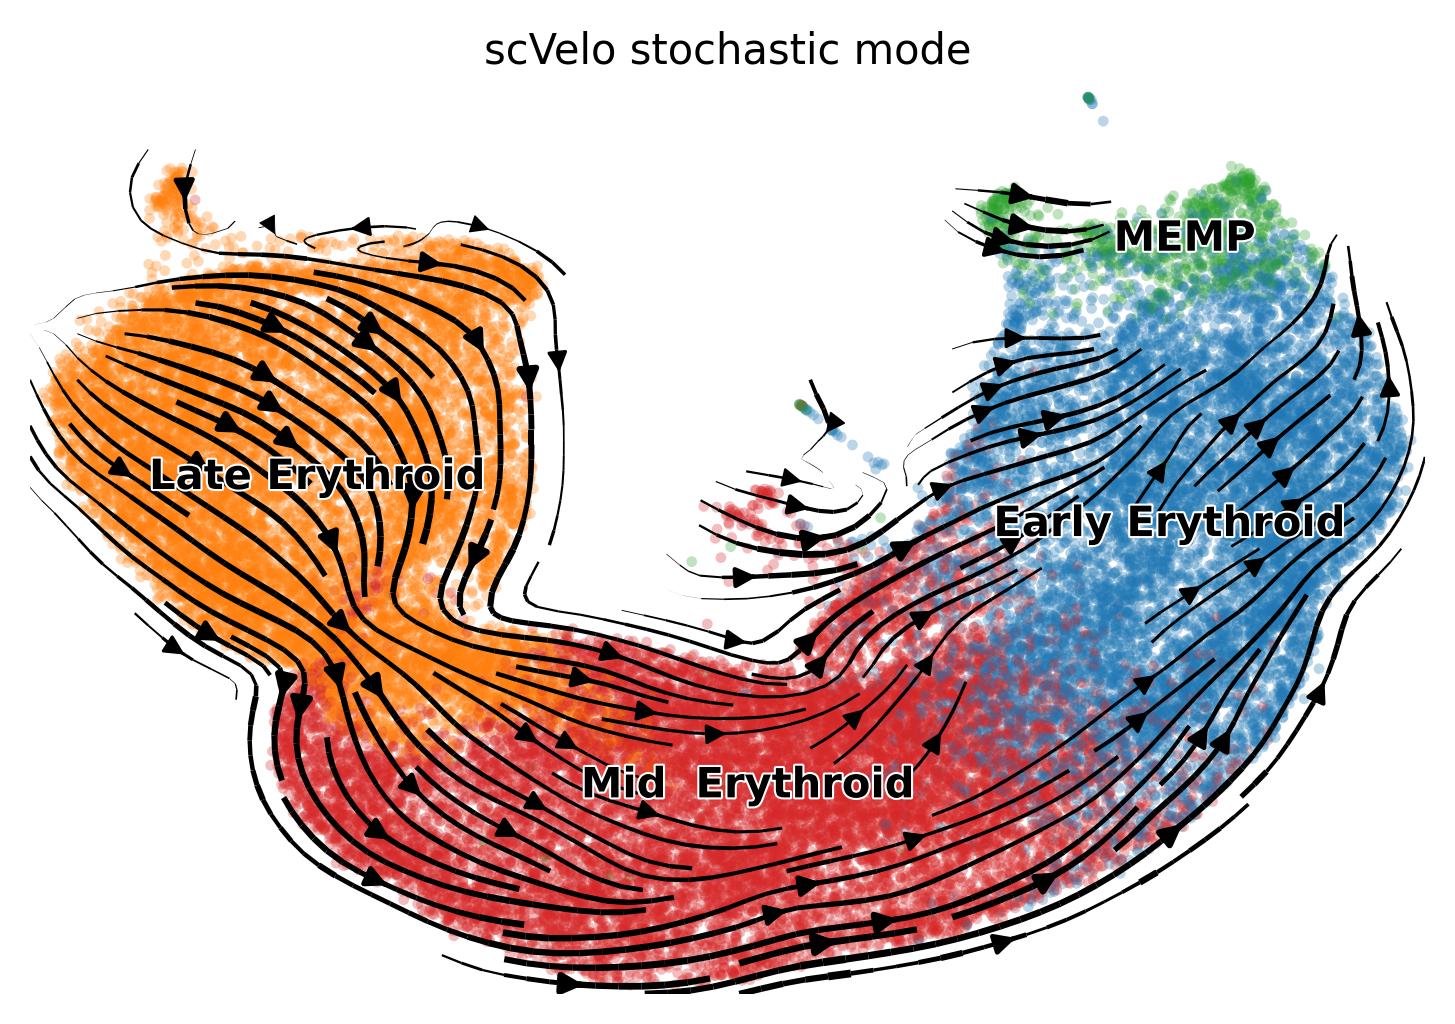

In [ ]:
title = 'scVelo stochastic mode'
adata = scv.read(dataset)
adata.uns['datapath'] = dataset
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=1500)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.velocity(adata, mode='stochastic')

scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=label, dpi=100, title=title)

In [4]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

computing neighbors
    finished (0:00:09) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
# Cross-Boundary Direction Correctness (A->B)
{('MEMP', 'Early Erythroid'): 0.0317840020151569, ('Early Erythroid', 'Mid  Erythroid'): -0.39916203076448264, ('Mid  Erythroid', 'Late Erythroid'): -0.6287981732491664}
Total Mean: -0.33205873399949737
# In-cluster Coherence
{'Early Erythroid': 0.80523455, 'Late Erythroid': 0.8449654, 'MEMP': 0.83297616, 'Mid  Erythroid': 0.7732701}
Total Mean: 0.8141115307807922


## scVelo dynamic

Filtered out 21711 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1500 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:09) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 20/40 cores)
---> # of velocity genes used 987


  0%|          | 0/987 [00:00<?, ?gene/s]

    finished (0:09:42) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
614 likeli
614 r2
492 scaling
    finished (0:04:33) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:50) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:13) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


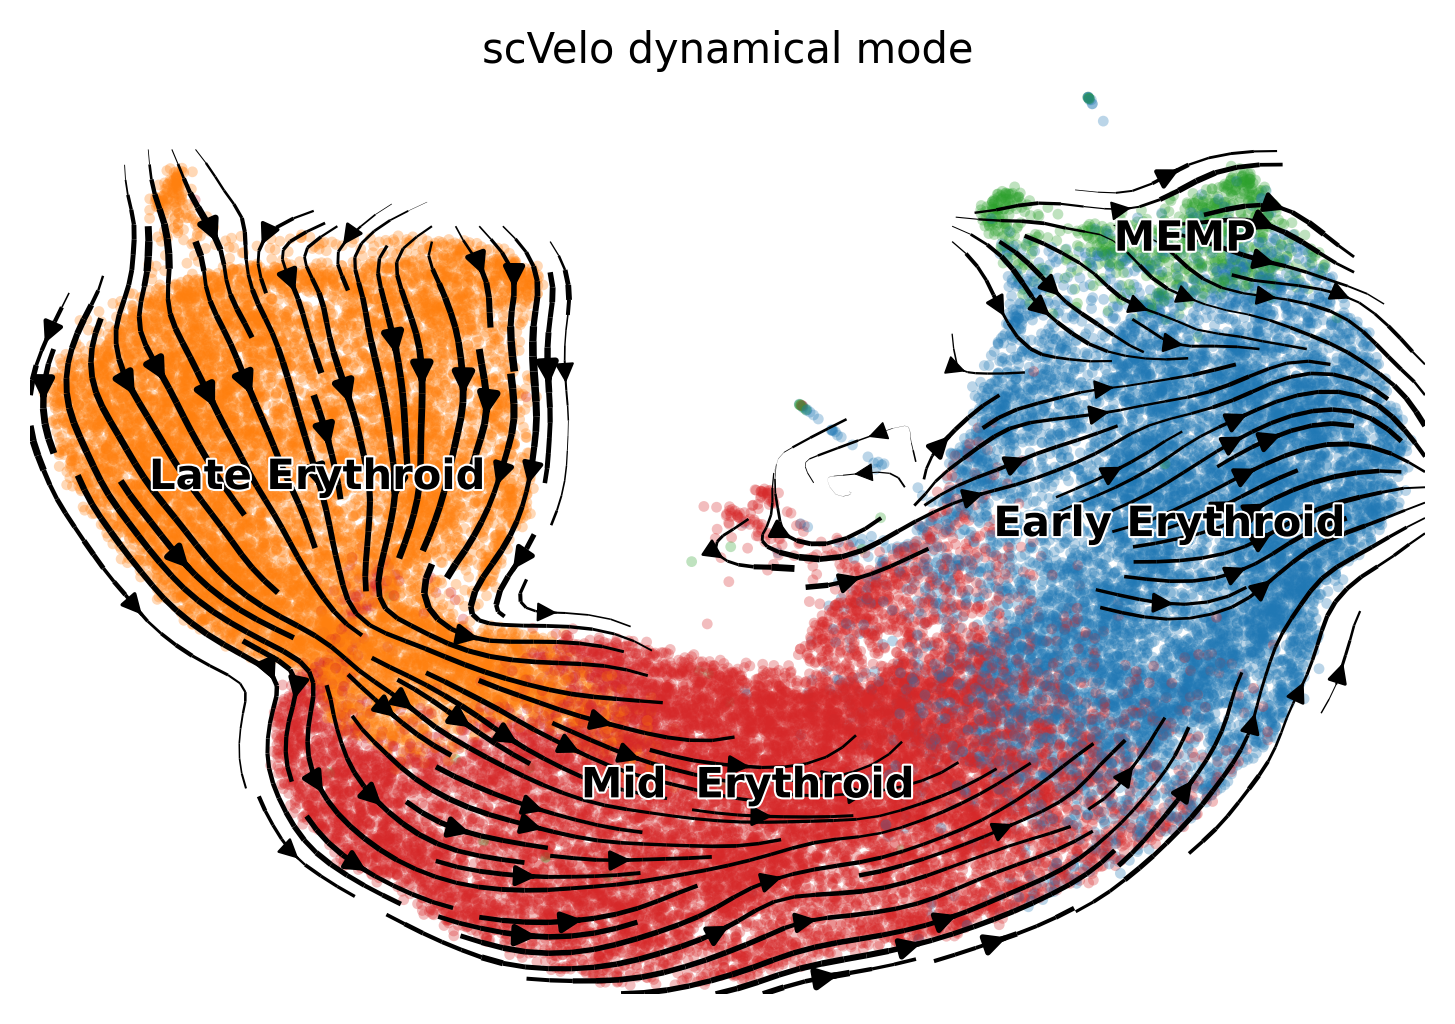

In [5]:
title = 'scVelo dynamical mode'
adata = scv.read(dataset)
adata.uns['datapath'] = dataset
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=1500)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata, n_jobs=20)
scv.tl.velocity(adata, mode='dynamical')

scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=label, dpi=100, title=title)

In [6]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
# Cross-Boundary Direction Correctness (A->B)
{('MEMP', 'Early Erythroid'): 0.1531286385035059, ('Early Erythroid', 'Mid  Erythroid'): -0.28306010454045333, ('Mid  Erythroid', 'Late Erythroid'): -0.655274398637846}
Total Mean: -0.26173528822493114
# In-cluster Coherence
{'Early Erythroid': 0.8745487916566604, 'Late Erythroid': 0.9181624626084015, 'MEMP': 0.8907878174738042, 'Mid  Erythroid': 0.8725068518968634}
Total Mean: 0.8890014809089324


In [ ]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=20)

## UniTVelo

In [5]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = False
velo_config.IROOT = None
velo_config.FIT_OPTION = '1'
velo_config.N_TOP_GENES = 1500

In [6]:
adata = utv.run_model(dataset, label, config_file=velo_config)
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')

-------> Model Configuration Settings <-------

 GPU: 2	FIG_DIR: ./figures/	BASE_FUNCTION: Gaussian	
 GENERAL: Curve	BASIS: None	N_TOP_GENES: 1500	
 OFFSET_GENES: False	FILTER_CELLS: False	EXAMINE_GENE: False	
 RESCALE_TIME: False	RESCALE_DATA: True	R2_ADJUST: False	
 IROOT: None	NUM_REPEAT: 1	FIT_OPTION: 1	
 DENSITY: SVD	REORDER_CELL: Soft_Reorder	AGGREGATE_T: True	
 ASSIGN_POS_U: False	WIN_SIZE: 50	LEARNING_RATE: 0.01	
 MAX_ITER: 10000	USE_RAW: False	RAW_GENES: False	



In [9]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
exp_metrics["model_dyn"] = utv.evaluate(adata_velo, cluster_edges, label, 'velocity')

# Cross-Boundary Direction Correctness (A->B)
{('MEMP', 'Early Erythroid'): 0.24644168234847277, ('Early Erythroid', 'Mid  Erythroid'): 0.4645663577186536, ('Mid  Erythroid', 'Late Erythroid'): 0.6836387497770323}
Total Mean: 0.46488226328138627
# In-cluster Coherence
{'Early Erythroid': 0.973097913195893, 'Late Erythroid': 0.9898648486504865, 'MEMP': 0.9856100343878735, 'Mid  Erythroid': 0.9865148818717091}
Total Mean: 0.9837719195264906


In [ ]:
scv.tl.latent_time(adata, min_likelihood=None)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=20)